### 2.3.7 カーネル法を用いたサポートベクタマシン

次の教師あり学習モデルは、カーネル法を用いたサポートベクターマシンだ。線形サポートベクターマシンを用いたクラス分類については、**「2.3.3.5 クラス分類のための線形モデル」**で説明した。カーネル法を用いたサポートベクタマシン（ただのSVMtも呼ばれる）は、入力空間の超平面のような簡単なモデルではなく、より複雑なモデルを可能にするために線形サポートベクタマシンを拡張したものである。サポートベクタマシンは、クラス分類にも回帰にも利用できるが、ここではSVCとして実装されているクラス分類についてだけ議論する。同じ議論が、SVRとして実装されているサポートベクタを用いた回帰にも適用できる。

カーネル法用いたサポートベクタマシンの背後にある数学はかなり難しく、本書の範囲を超える。詳細が知りたければ、Hastie、Tibshirami、Friedmanの『*The Elements of Statistical Learning*』

#### 2.3.7.1 線形モデルと非線形特徴量

**図2-15**で説明したように、低次元における線形モデルは非常に制約が強い、直線や超平面が柔軟性を制限するからだ。線形モデルを柔軟にする方法の一つが、特徴量を追加することだ。例えば、入力特徴量の交互作用（積）や多項式項を加えることが考えられる。

**「2.3.5.4 決定木の特徴量の重要性」**で用いた合成データセットを見てみよう。（**図2-29**）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 1')

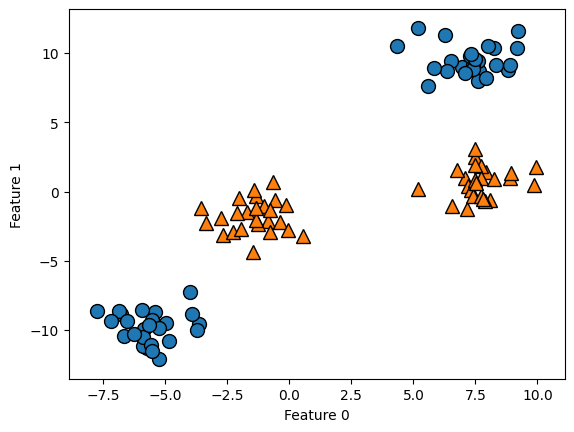

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-36 線形分離が不可能な２クラス分類データセット**

線形モデルによるクラス分類では、直線で分離することしかできないので、このようなデータセットではうまくいかない（**図2-37**）。

Text(0, 0.5, 'Feature 1')

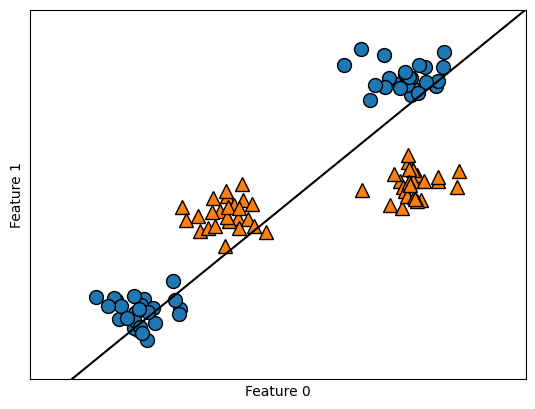

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-37 線形SVMで見つかった決定境界**

ここで入力特徴量を拡張してみよう。例えば、feature1 ** 2、つまり２番目の特徴量の２乗を新しい特徴量として加えてみる。これrで、データポイントは（feature0, feature1）の２次元の点ではなく、（feature0, feature1, feature1 ** 2）の３次元の点になる。[^hoge] と[^hoge]: 新しい表現を３次元散布図にしたものを**図2-38**に示す。

C:\Users\seiji\AppData\Local\Temp\ipykernel_19596\403655895.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
C:\Users\seiji\AppData\Local\Temp\ipykernel_19596\403655895.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


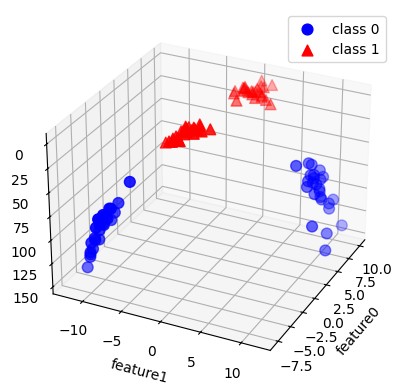

In [5]:
# ２番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
# y == 0の点をプロットしてからy == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.legend(["class 0", "class 1"], loc="best")

plt.show()



**図2-38 図2-37のデータセットを拡張したもの。feature1から３番目の特徴量を作っている**

この新しい表現では、２つのクラスを線形モデルで、つまり３次元空間内の平面を用いて分類することが可能になっている。この拡張されたデータセットに対して線形モデルを適用すればわかる（**図2-39**）。

C:\Users\seiji\AppData\Local\Temp\ipykernel_19596\256631894.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
C:\Users\seiji\AppData\Local\Temp\ipykernel_19596\256631894.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)


Text(0.5, 0, 'feature1 ** 2')

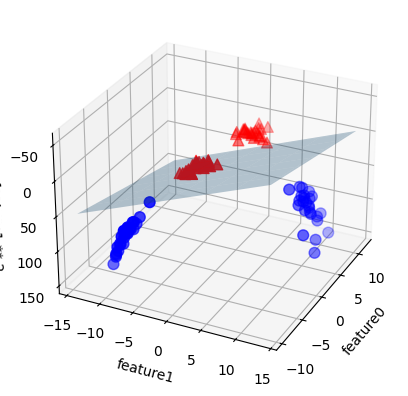

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定境界を描画
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

**図2-39 拡張された３次元空間で、線形SVMで見つかった決定境界**

元の特徴量の関数としてみると、線形SVMモデルは線形ではなくなっている。**図2-40**からわかるように、直線ではなく楕円になっている。

Text(0, 0.5, 'Feature 1')

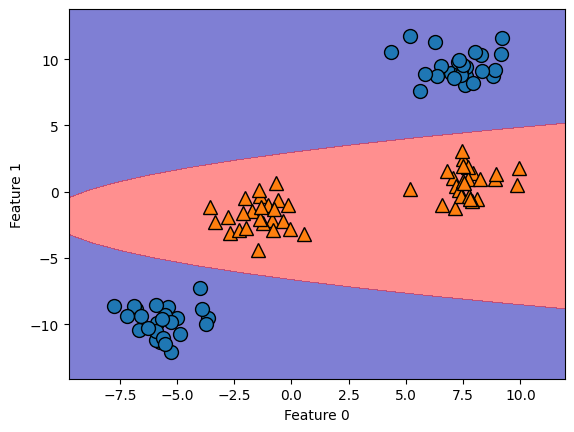

In [7]:
zz = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), zz.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-40 図2-39の決定境界をもとの２つの特長量の関数として表示**

#### 2.3.7.2 カーネルトリック

これでわかるのは、非線形の特徴量をデータ表現に加えることで、線形モデルがはるかに強力になるということだ。しかし、実際にはどの特徴量を加えたらよいかわからない。たくさんの特徴量を加える（100次元の特徴量に対してすべての可能な積を加えるなど）と、計算量が大きくなりすぎる。幸運なことに、非常に大きくなりうる表現を実際に計算せずに、高次元空間でのクラス分類器を学習させる巧妙な数学的トリックがある。これが**カーネルトリック**（kernel trick）と呼ばれるもので、拡張された特長表現需要でのデータポイント間の距離を、実際にデータポイントの拡張を計算せずに、直接計算する方法である。

サポートベクターマシンで広く用いられている高次元空間へのマップ方法が２つある。もとの特徴量の特定の次数までのすべての多項式（feature ** 2 * feature2 ** 5など）を計算する多項式カーネル（polynominal kernnel）と、放射基底関数（radial basis function:RBF）カーネルとも呼ばれるガウシアンカーネルである。ガウシアンカーネルは、無限次元の特徴空間に対応するので説明が難しい。直観的には、ガウシアンカーネルではすべての次数のすべての多項式を考えるが、次数が高くなるにつれてその特徴量の重要性を小さくしている。

しかし、カーネル法を用いたSVMの背後にある数学の詳細は、実用上重要ではない。RBFカーネルを用いたSVMによる決定の様子を見るのは簡単だ。次の節で見ていこう。

#### 2.3.7.3 SVMを理解する

訓練の過程で、SVMは個々のデータポイントが、２つのクラスの決定境界を表現するのにどの程度重要可を学習する。多くの場合、２つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する。これらのデータポイントを**サポートベクタ**（support vector）と呼ぶ。これがサポートベクターマシンの名前の由来である。

新しいデータポイントに対して予測を行う際に、サポートベクタとデータポイントとの距離が測定される。クラス分類は、このサポートベクタとの距離と、訓練課程で学習された個々のサポートベクタの重要性（SVCのdual_coef_属性に格納されている）によって決定されている。

データポイント間の距離は次のように定義されるガウシアンカーネルで測られる。$$k_{rbf}(x_1, x_2) = \mathrm{exp}(-\gamma \| x_1 - x_2 \| ^2)$$

ここで、$x_1$と$x_2$はデータポイントである。$\| x_1 - x_2 \|$はユークリッド距離を表し、$\gamma$（ガンマ）はガウシアンカーネルの幅を制御するパラメータである。

図2-41に、２次元２クラス分類データセットに対してサポートベクタマシンを学習させた結果を示す。決定境界は黒で描かれており、サポートベクタは大きく縁取りされた点で描かれている。このプロットをforgeデータセットに対してSVMを訓練して描画するコードを下に示す。



Text(0, 0.5, 'Feature 1')

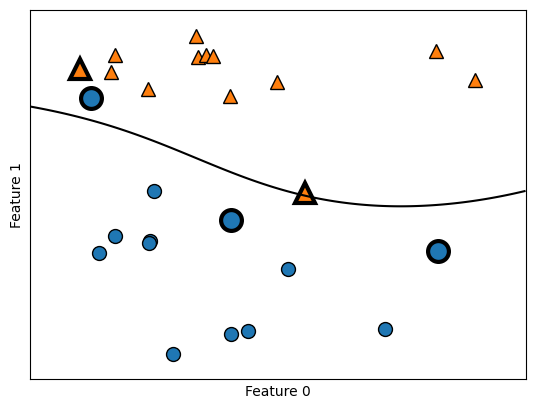

In [8]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# サポートベクタをプロット
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**図2-41 RBFカーネル法を用いたSVMによる決定境界とサポートベクタ**

この場合、SVMによる協会は非常に滑らかで、非線形（直線でない）である。ここでは、Cとgammaの二つのパラメータを調整している。これらについては次に述べる。

#### 2.3.7.4 SVMパラメータの調整

gammaパラメータは、前節の式に出てきたもので、ガウシアンカーネルの幅を調整する。このパラメータが、点が近いということを意味するスケールを決定する。Cパラメータは、線形モデルで用いられたのと同様の正則化パラメータである。個々のデータポイントの重要度（より詳しく言うとデータポイントのdual_coef_）を制限する。

これらのパラメータを変化させると何が起こるかを見てみよう（**図2-42**）。

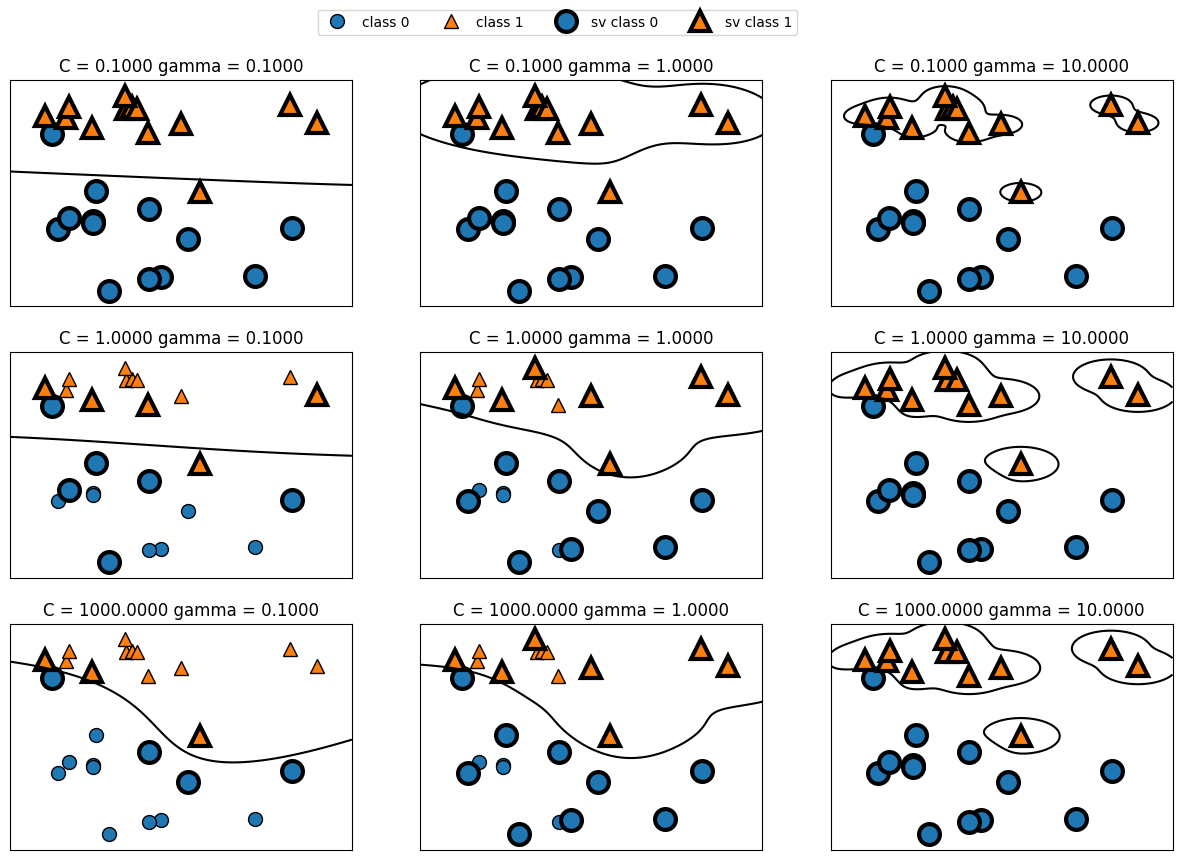

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

**図2-42 さまざまなCとgammaに対する決定境界とサポートベクタ**

左から右へ、パラメータgammaを0.1から10に変化させている。gammaが小さいと、ガウシアンカーネルの直径が大きくなり、多くの点を近いと判断するようになる。これによって、左の方では決定境界が滑らかになり、右に行くにつ入れて個々のデータポイントをより重視するようになっている。gammaが大きくなるとモデルはより複雑になる。

上から下に、パラメータCを0.1から1000に変化させている。線形モデルの場合と同様に、小さいCは制限されたモデルに対応し、個々のデータポイントの与える影響は限定される。左上の決定境界を見るとほとんど直線であることからもこれがわかる。クラス分類に失敗したデータポイントもあるが、決定境界にはまったく影響を与えていない。Cを大きくすると、左下のグラフからもわかるように、これらのデータポイントがより強い影響を持つことになり、正しくクラス分類されるように決定境界を曲げている。

RBFカーネル法を用いたSVMをcancerデータセットに適用してみよう。デフォルトパラメータは、C=1、gamma=1/n_featuresとなっている。

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


**注：書籍では結果が  
Accuracy on training set: 1.00  
Accuracy on test set: 0.63  
となった。原因不明**

訓練セット精度は100%で、テストセット精度は63%ということから、強く過剰適合していることがわかる。SVMはうまく動く場合が多いのだが、パラメータの設定と、データのスケールに敏感であるという問題がある。特に、すべての特徴量の変異が同じスケールであることを要求する。個々の特徴量の最大値と最小値を、対数でプロットしたものを見てみよう（**図2-43**）。

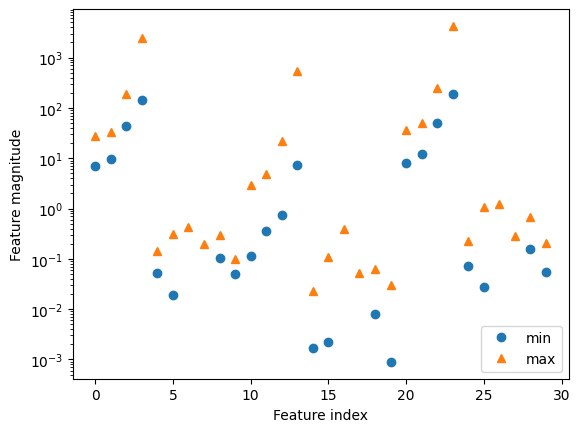

In [13]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

**図2-43 cancerデータセットの特徴量のレンジ（y軸は対数スケールであることに注意）**

cancerデータセットの特徴量は相互に桁違いにサイズが違うことがわかる。これはほかのモデル（線形モデルなど）でも問題になるが、カーネル法を用いたSVMでは破壊的な影響をもたらす。この問題を解決する方法を見みよう。

#### SVMのためのデータの前処理

この問題を解決する方法の１つが、すべての特徴量が大体同じスケールになるように、それぞれスケールを変換する方法である。カーネル法を用いたSVMでよく使われる方法は、すべての特長量が０から１の間になるようにスケールを変換する方法だ。これをMinMaxScakerで行う方法は、このテーマを詳しく取り扱う「**３章　教師なし学習と前処理**」で見る。ここでは「手で」やってみよう。

In [15]:
# 訓練セットの特長量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特長量ごとにレンジ（最大値 - 最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# => min=0, max=1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [16]:
# テストセットに対しても同様に行う
# テストセットの最小値とレンジは訓練セットから計算する
X_test_scaled = (X_test - min_on_training) / range_on_training

In [19]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


データをスケールしたら、結果が一変した（**注：今回はわずかに改善した程度に見える。しかし本書記載の結果と比較すると、大きく改善している**）いまは、訓練セット精度とテストセットがだいたい同じで、100%からは遠いという、適合不足の領域に入っている。ここからCやgammaを増やして、より複雑なモデルにしていこう。例えば以下のようにする。

In [20]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


**注：書籍では結果が  
Accuracy on training set: 0.988  
Accuracy on test set: 0.972  
となった。原因不明  
今回は過剰適合となっている**

#### 2.3.7.6 利点、欠点、パラメータ

カーネル法を用いたサポートベクタマシン（SVM）は、さまざまなデータセットに対してうまく機能する強力なモデルである。SVMを用いると、データにわずかな特徴量しかない場合にも複雑な決定境界を生成することができる。低次元のデータでも高次元のデータでも（つまり特徴量が少なくても多くても）、うまく機能するが、サンプルの個数が大きくなるとうまく機能しない。SVMは10,000サンプルくらいまではうまく機能するが、100,000サンプルくらいになると、実行時やメモリ使用量の面で難しくなってくる。

SVMの問題点は、注意深くデータの前処理とパラメータ調整を行う必要があるということだ。今のところ多くのアプリケーションで、勾配ブースティングなどの（ほとんど、もしくは全く前処理が不要な）決定木ベースのモデルのほうが用いられているのはこのためだ。さらに、SVMのモデルは検証が難しい。ある予測がされた理由を理解することが難しく、モデルを専門家以外に説明するのも大変だ。

しかし、特徴量が似た測定器の測定結果（例えばカメラのピクセルなど）のように、同じスケールになる場合には、SVMを試してみる価値がある。

カーネル法を用いたSVMで重要なパラメータは、正則化パラメータCと、カーネルの選択と、カーネル固有のパラメータである。ここでは、RBFカーネルについて注目したが、scikit-learnには他のカーネルも用意されている。RBFカーネルのパラメータは、ガウシアンカーネルの幅の逆数を表すgammaだけである。gammaとCは両方ともモデルの複雑さを制御するパラメータで、大きくするとより複雑なモデルになる。したがって、２つのパラメータの設定は強く相関するため、Cとgammaは同時に調整する必要がある。